### Fazendo uma comparação de performance do MAB-UCB1-Tuned, comparado com o UCB1. Conforme o projeto do Alison Carrera(https://github.com/alison-carrera/mabalgs), que tem sido amplamente utilizado para a implementação de MAB's.

In [6]:
# Importando um simulador de resultados. Com ele, podemos simular
# como os dados reais se comportariam e como os algoritmos
# conseguem reagir a eles, a cada escolha de arm.
# Ao fim, vamos comparar suas performances

from mab import simulator

In [7]:
# Importando o MAB-UCB1

from mab.algs import UCB1

In [3]:
# importando o matplotlib, para visualização gráfica dos resultados

import matplotlib.pyplot as plt

In [4]:
# Definindo as médias de rewards de cada arm antes da primeira interacao.
# A ideia é que os algoritmos consigam entender 
# qual arm retorna as melhores recompensas em média
# e consiga escolhê-lá majoritariamente

medias = {0:[0.9, 0.15, 0.2, 0.25, 0.3]}

n_interacoes = 6000
n_simulacoes = 500

In [5]:
# Instanciando dois simuladores, um para UCB1 e outro
# para UCB1-Tuned

mcs_ucb1 = simulator.MonteCarloSimulator()
mcs_ucb1_tuned = simulator.MonteCarloSimulator()

In [10]:
# Rodando os algoritmos de simulações
results_ucb1 = mcs_ucb1.run('ucb1', medias, n_simulacoes, n_interacoes)

In [11]:
results_ucb1_tuned = mcs_ucb1_tuned.run('tuned', medias, n_simulacoes, n_interacoes)

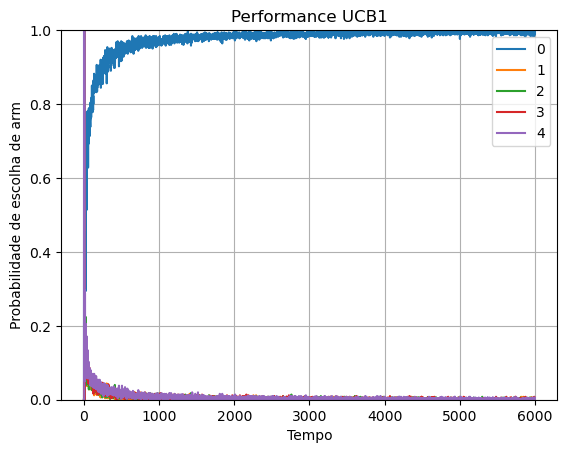

In [13]:
# Verificando os resultados do UCB1

plt.ylim(0.0, 1.0)
plt.title('Performance UCB1')
plt.xlabel('Tempo')
plt.ylabel('Probabilidade de escolha de arm')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,0], label='0')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,1], label='1')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,2], label='2')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,3], label='3')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,4], label='4')
plt.legend()
plt.grid(True)

plt.show()

Percebe-se que o arm4 é mais escolhido no começo, porém conforme o numero de interações aumenta, o arm 0 começa a ser escolhido prioritáriamente, o que é esperado devido a probabilidade do número de escolhas que foi definida.

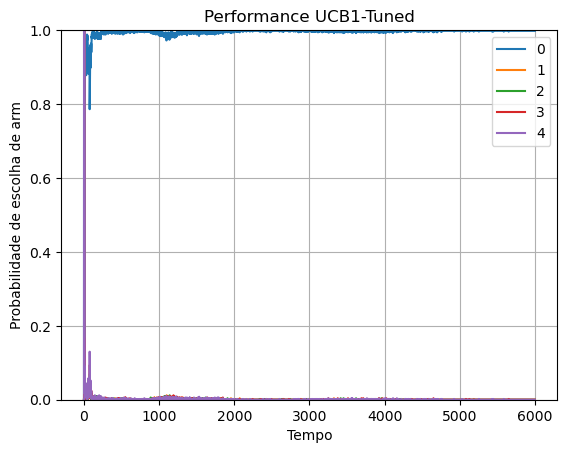

In [14]:
# Verificando os resultados do UCB1-Tuned

plt.ylim(0.0, 1.0)
plt.title('Performance UCB1-Tuned')
plt.xlabel('Tempo')
plt.ylabel('Probabilidade de escolha de arm')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,0], label='0')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,1], label='1')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,2], label='2')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,3], label='3')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,4], label='4')
plt.legend()
plt.grid(True)

plt.show()


Assim como o UCB-1, o UCB-1-Tuned escolheu o arm 0 para maior entrega, conforme esperado com a definição da probabilidade de recompensa por entrega. Porém é possível perceber que o UCB-1-Tuned conseguiu chegar a esse resultado com um número de interações menor. O UCB-1 chegou ao arm0 como prioritário após cerca de 1000 interações, já o UCB1-Tuned chegou a esse resultado com algo em torno de 100 a 200 interações.

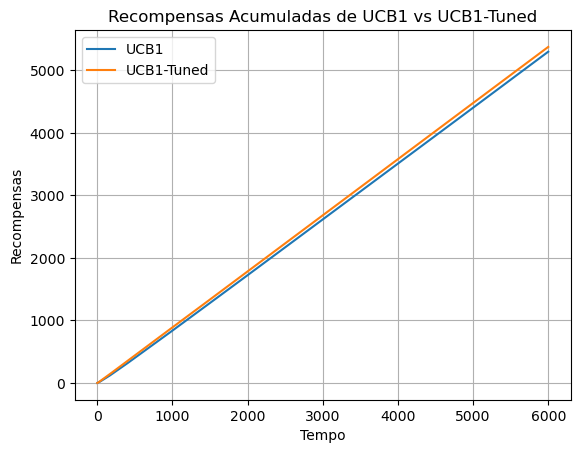

In [16]:
# Fazendo a compração dos rewards do UCB-1 e UCB1-Tuned

plt.title('Recompensas Acumuladas de UCB1 vs UCB1-Tuned')
plt.xlabel('Tempo')
plt.ylabel('Recompensas')
plt.plot(range(results_ucb1[1]),results_ucb1[3],label='UCB1')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[3], label='UCB1-Tuned')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print("Recompensas Acumuladas UCB1: {}".format(results_ucb1[3][-1]))
print("Recompensas Acumuladas UCB1-Tuned: {}".format(results_ucb1_tuned[3][-1]))

Recompensas Acumuladas UCB1: 5297.42000000011
Recompensas Acumuladas UCB1-Tuned: 5373.958000000131


É possível perceber que a reta do UCB1-Tuned é levemente acima da reta UCB1, tendo assim mais recompensas por interação, escolhendo anteriormente o arm com mais interações positivas. O que é comprovado quando comparamos os valores finais.